In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/gurgaon_properties_cleaned_v2.csv')

In [3]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,raheja navodaya,sector 92,0.62,4807.0,1290.0,Built Up area: 1498 (139.17 sq.m.)Carpet area:...,2,2,2,...,NaN,1498.0,1064.0,0,0,0,0,0,0,0
1,flat,paras quartier,gwal pahari,5.90,11028.0,5350.0,Built Up area: 5350 (497.03 sq.m.),4,4,3+,...,NaN,5350.0,NaN,0,0,0,0,0,0,63
2,flat,signature global synera,sector 81,0.50,7886.0,634.0,Carpet area: 634 (58.9 sq.m.),2,2,1,...,NaN,NaN,634.0,0,0,0,0,0,2,97
3,flat,ss the leaf,sector 85,2.05,7290.0,2812.0,Super Built up area 2812(261.24 sq.m.)Built Up...,4,4,3+,...,2812.0,2500.0,2250.0,0,1,0,0,0,1,49
4,flat,m3m heights,sector 65,1.99,15793.0,1260.0,Super Built up area 1260(117.06 sq.m.),2,2,2,...,1260.0,NaN,NaN,0,0,0,0,0,0,48


In [4]:
df.shape

(3829, 23)

In [5]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_4992\278911598.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


3.31401195974431


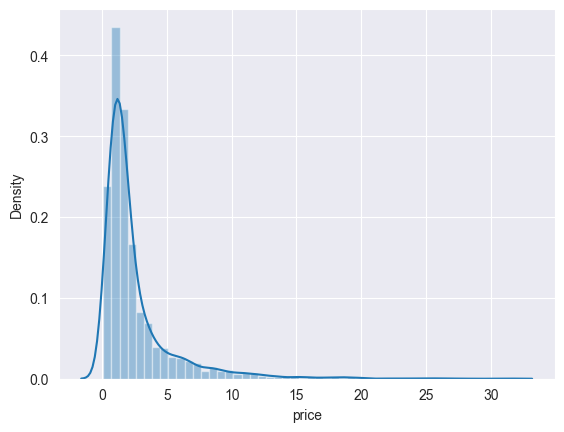

In [6]:
sns.distplot(df['price'])
print(df['price'].skew())

<Axes: xlabel='price'>

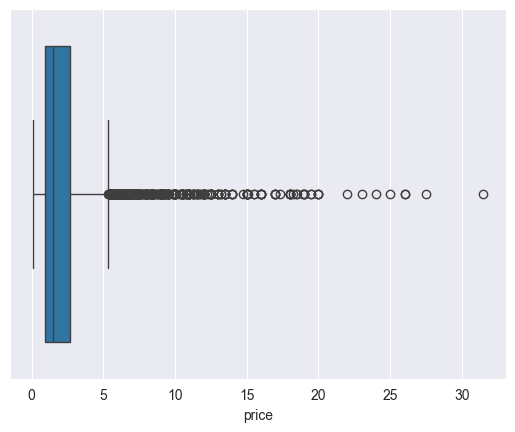

In [7]:
sns.boxplot(x=df['price'])

In [8]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(432,
 count    432.000000
 mean       9.196157
 std        4.061291
 min        5.350000
 25%        6.400000
 50%        8.000000
 75%       10.607500
 max       31.500000
 Name: price, dtype: float64)

In [9]:
outliers.sort_values('price', ascending = False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2298,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,...,NaN,9000.0,NaN,1,1,1,1,0,2,74
151,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,...,NaN,11286.0,NaN,1,1,0,1,1,1,42
3652,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,...,NaN,4545.0,NaN,1,1,0,1,1,1,138
3530,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,...,NaN,400.0,350.0,1,1,1,1,0,1,72
1912,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,...,NaN,1000.0,NaN,1,1,1,1,0,0,0
194,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,...,NaN,400.0,NaN,1,1,0,1,0,1,122
3061,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,...,NaN,9000.0,NaN,1,1,1,1,0,1,145
2086,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,...,NaN,1000.0,NaN,0,1,0,0,0,0,54
619,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,...,NaN,500.0,NaN,0,1,0,0,0,1,31
691,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,...,NaN,4500.0,NaN,0,1,0,1,0,2,97


# on the basis of price col we can say that there are some genuine outliers but there are some data errors as well

price_per_sqft

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_4992\690956398.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


11.418675437971375


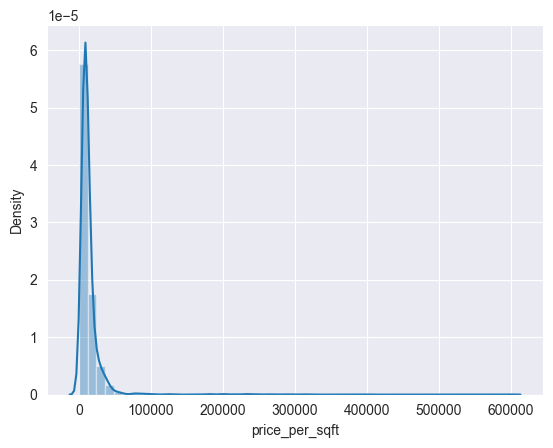

In [10]:
sns.distplot(df['price_per_sqft'])
print(df['price_per_sqft'].skew())

<Axes: xlabel='price_per_sqft'>

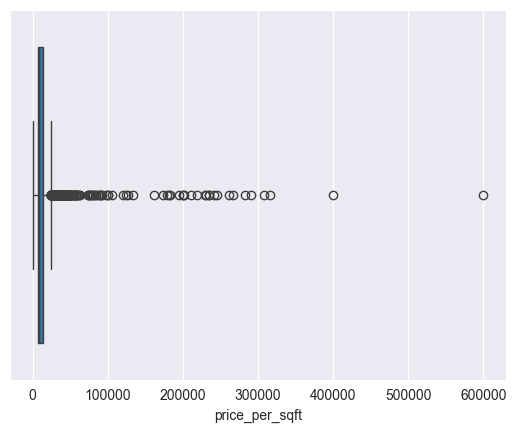

In [11]:
sns.boxplot(x=df['price_per_sqft'])

In [12]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(368,
 count       368.000000
 mean      52177.622283
 std       60675.137346
 min       24202.000000
 25%       27778.000000
 50%       33333.000000
 75%       41821.750000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [13]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x : x * 9 if x < 1000 else x)

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_4992\1713572631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x : x * 9 if x < 1000 else x)


In [14]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price'] * 10000000) / outliers_sqft['area'])

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_4992\651794834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price'] * 10000000) / outliers_sqft['area'])


In [15]:
outliers_sqft['price_per_sqft'].describe()

count      368.000000
mean     29104.138587
std      12339.491211
min       2689.000000
25%      25000.000000
50%      29587.500000
75%      35486.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [16]:
df.update(outliers_sqft)

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_4992\2861189070.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

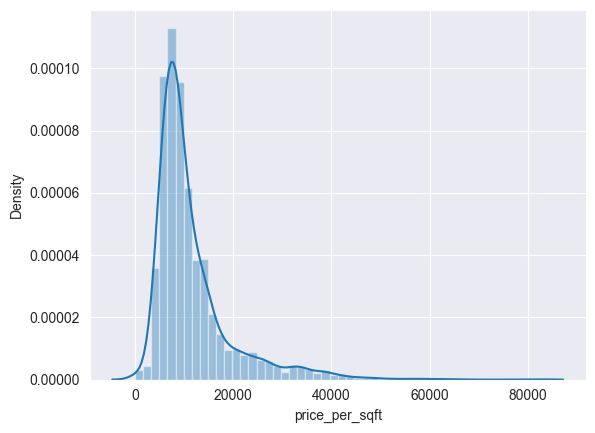

In [17]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

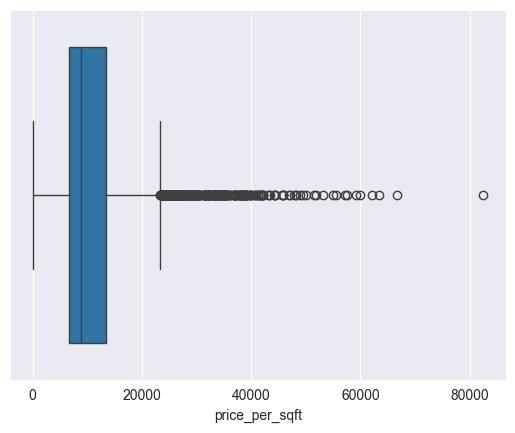

In [18]:
sns.boxplot(x=df['price_per_sqft'])

In [19]:
df[df['price_per_sqft'] > 50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
194,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5,5,2,...,NaN,400.0,NaN,1,1,0,1,0,1,122
1149,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,...,NaN,325.0,300.0,1,1,1,1,0,1,72
2056,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,...,NaN,3240.0,NaN,1,1,0,1,0,2,75
2087,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3,3,0,...,NaN,1000.0,NaN,0,0,0,0,0,0,0
2116,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,...,NaN,2844.0,NaN,1,1,1,1,0,1,153
2126,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,...,NaN,140.0,NaN,0,0,0,0,0,0,0
2659,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3,3,0,...,NaN,1565.0,NaN,0,0,0,0,0,0,0
2752,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,...,NaN,2250.0,NaN,1,1,0,0,0,1,160
3183,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,...,NaN,1600.0,NaN,0,0,0,0,0,1,99
3515,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4,4,3,...,NaN,250.0,200.0,1,1,1,1,0,1,103


In [20]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

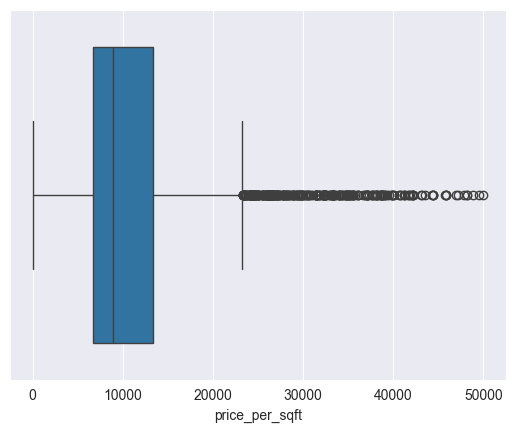

In [21]:
sns.boxplot(x = df['price_per_sqft'])

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_4992\3155724510.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

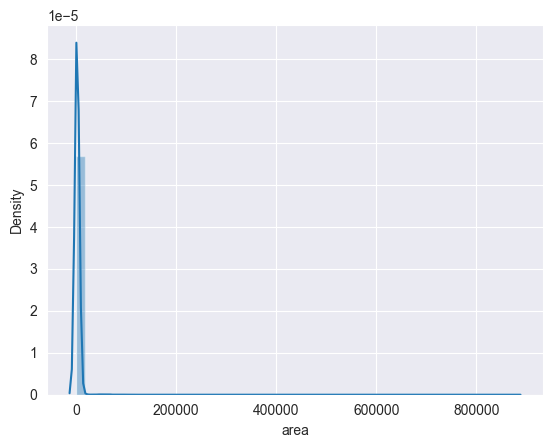

In [22]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

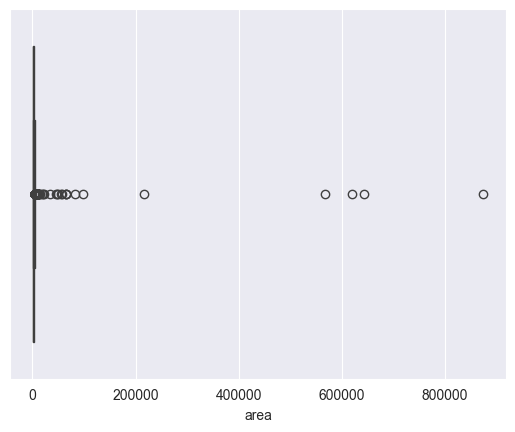

In [23]:
sns.boxplot(x = df['area'])

In [24]:
df['area'].describe()

count      3778.000000
mean       2904.142403
std       22804.266831
min         145.000000
25%        1255.500000
50%        1744.500000
75%        2336.750000
max      875000.000000
Name: area, dtype: float64

In [25]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
123,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,...,NaN,2.0,NaN,1,1,0,1,1,1,0
476,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,...,NaN,NaN,514396.0,0,0,0,0,0,0,44
1593,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,...,NaN,NaN,569243.0,0,0,0,0,0,0,76
2875,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,...,NaN,NaN,607936.0,1,0,0,0,1,0,65
3256,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,...,NaN,737147.0,NaN,0,0,0,0,0,2,44


In [26]:
df = df[df['area'] < 100000]

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_4992\3155724510.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

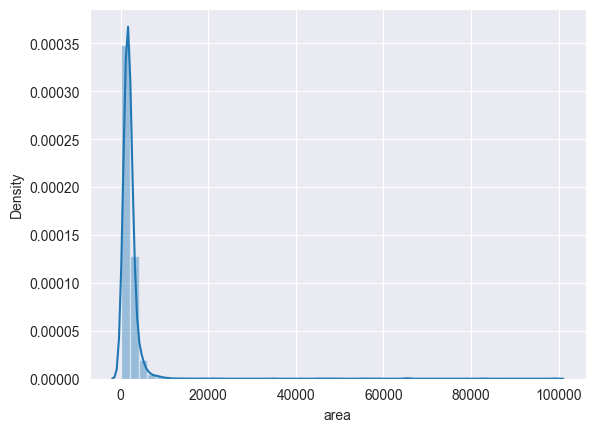

In [27]:
sns.distplot(df['area'])

In [28]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1525,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,...,NaN,NaN,11000.00,0,1,1,1,0,1,60
671,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,...,NaN,115.0,NaN,0,0,0,0,1,0,7
1678,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,...,NaN,NaN,64529.00,1,0,0,0,0,0,15
3172,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,...,NaN,NaN,64412.00,0,0,0,0,0,0,51
142,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,...,NaN,NaN,7250.00,0,0,0,0,0,0,0
1295,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.00,0,0,0,0,0,0,15
2848,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,...,NaN,NaN,54917.00,0,0,0,0,0,0,37
2297,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,...,NaN,NaN,48811.00,1,0,0,0,0,0,37
551,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,...,NaN,5800.0,5200.00,0,1,1,0,0,1,109
2508,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,...,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [29]:
df.drop(index=[1525, 551, 337, 681, 196, 196, 1198], inplace=True)

In [30]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
671,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,...,NaN,115.0,NaN,0,0,0,0,1,0,7
1678,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,...,NaN,NaN,64529.00,1,0,0,0,0,0,15
3172,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,...,NaN,NaN,64412.00,0,0,0,0,0,0,51
142,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,...,NaN,NaN,7250.00,0,0,0,0,0,0,0
1295,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.00,0,0,0,0,0,0,15
2848,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,...,NaN,NaN,54917.00,0,0,0,0,0,0,37
2297,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,...,NaN,NaN,48811.00,1,0,0,0,0,0,37
2508,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,...,NaN,NaN,45966.00,0,0,0,0,1,0,33
2149,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1,1,1,...,NaN,NaN,34401.00,0,0,0,0,0,0,68
1157,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,...,NaN,NaN,18122.00,1,0,0,1,1,1,44


In [31]:
df.loc[671, 'area'] = 1359
df.loc[142, 'area'] = 7250
df.loc[2174, 'area'] = 1500
df.loc[3465, 'area'] = 1175
df.loc[151, 'area'] = 1254

In [32]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1678,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,...,NaN,NaN,64529.0,1,0,0,0,0,0,15
3172,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,...,NaN,NaN,64412.0,0,0,0,0,0,0,51
1295,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
2848,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,...,NaN,NaN,54917.0,0,0,0,0,0,0,37
2297,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,...,NaN,NaN,48811.0,1,0,0,0,0,0,37
2508,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,...,NaN,NaN,45966.0,0,0,0,0,1,0,33
2149,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1,1,1,...,NaN,NaN,34401.0,0,0,0,0,0,0,68
1157,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,...,NaN,NaN,18122.0,1,0,0,1,1,1,44
1443,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,...,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [33]:
df.drop(index=[1678, 3172, 1295, 2848, 2297, 2508, 2149], inplace=True)

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_4992\3155724510.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

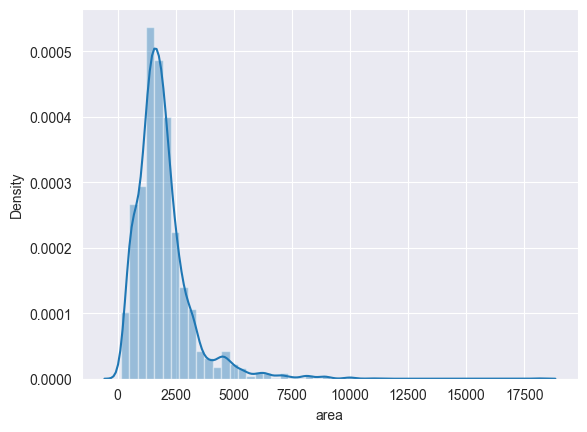

In [34]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

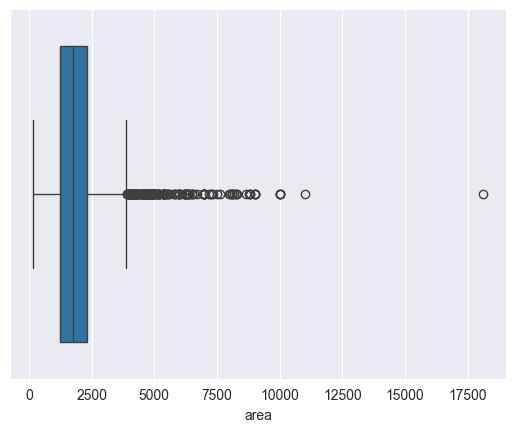

In [35]:
sns.boxplot(x=df['area'])

In [36]:
df['area'].describe()

count     3760.000000
mean      1939.092819
std       1222.504289
min        145.000000
25%       1250.000000
50%       1741.000000
75%       2302.750000
max      18129.000000
Name: area, dtype: float64

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_4992\1737319938.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

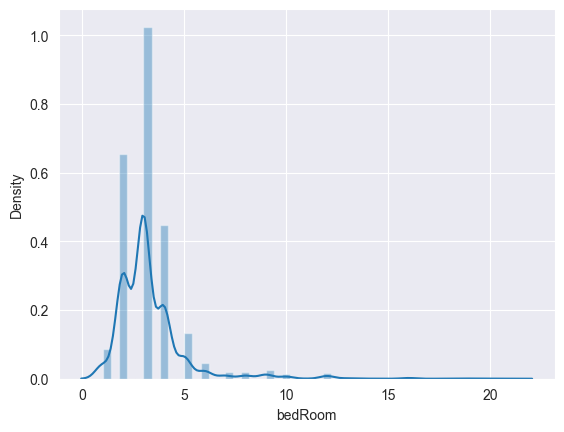

In [37]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

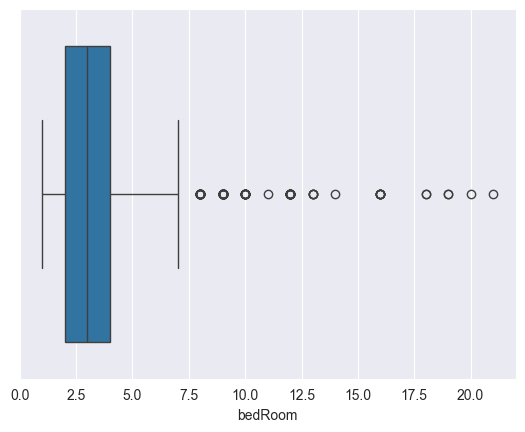

In [38]:
sns.boxplot(x = df['bedRoom'])

In [39]:
df['bedRoom'].describe()

count    3760.000000
mean        3.309574
std         1.806969
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [40]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3733,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,...,NaN,1161.0,NaN,0,1,0,0,0,2,49
550,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,...,NaN,1152.0,NaN,0,1,0,0,0,2,22
1387,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,...,NaN,7500.0,NaN,1,0,1,0,0,0,68
3425,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,...,NaN,1622.0,NaN,1,1,1,1,0,0,74
47,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,...,NaN,1440.0,NaN,0,1,0,0,0,2,70
3466,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,...,NaN,1503.0,NaN,0,0,0,0,1,2,57
1638,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16,18,2,...,NaN,2700.0,NaN,0,1,0,1,0,1,49
1460,house,dlf city plots,sector 26,20.00,44267.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,...,NaN,4518.0,NaN,1,1,1,1,0,1,153
2284,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16,16,3+,...,NaN,2700.0,NaN,1,1,0,1,1,0,41
1551,house,independent,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16,16,3+,...,NaN,1800.0,NaN,0,0,0,0,0,1,20


In [41]:
df = df[df['bedRoom'] <= 10]

In [42]:
df.shape

(3715, 23)

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_4992\1737319938.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

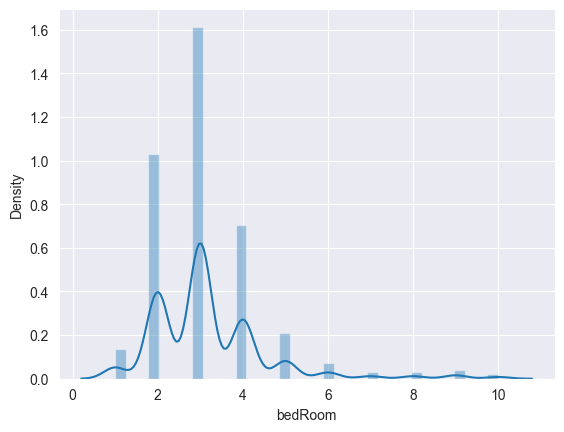

In [43]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

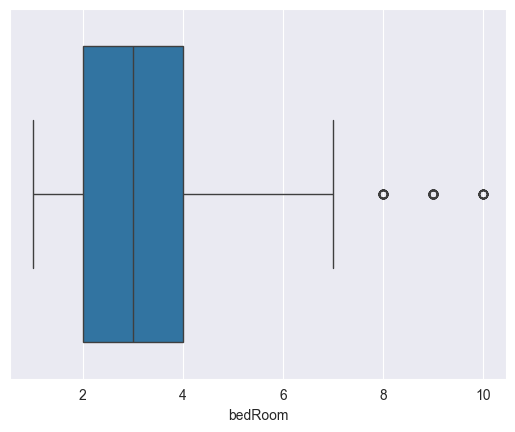

In [44]:
sns.boxplot(x = df['bedRoom'])

In [45]:
df['bedRoom'].describe()

count    3715.000000
mean        3.183849
std         1.378681
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_4992\3997140768.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

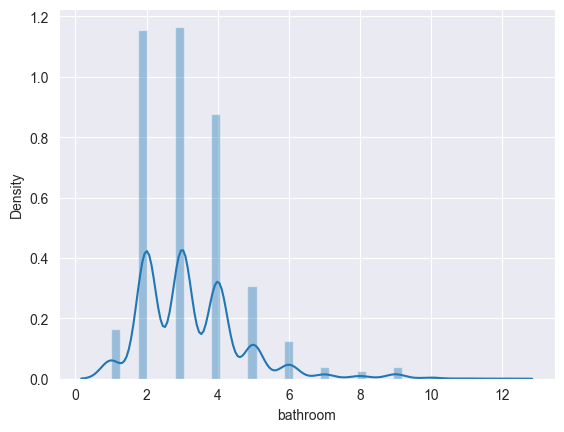

In [46]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

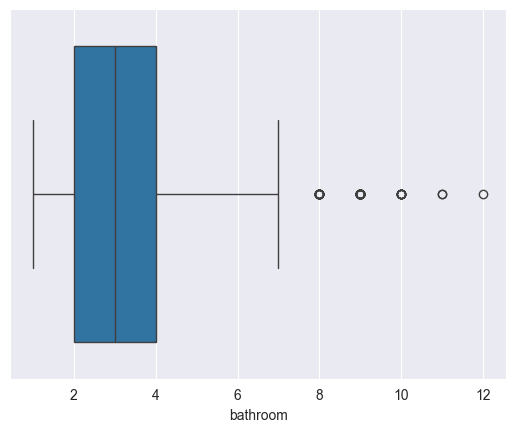

In [47]:
sns.boxplot(x=df['bathroom'])

In [48]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1364,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,...,NaN,6390.0,NaN,0,1,0,0,0,1,146
2077,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,...,NaN,5000.0,NaN,1,1,0,1,1,1,39
3675,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,...,NaN,7000.0,NaN,0,0,0,1,0,1,38


In [49]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,raheja navodaya,sector 92,0.62,4807.0,1290.0,Built Up area: 1498 (139.17 sq.m.)Carpet area:...,2,2,2,...,NaN,1498.0,1064.0,0,0,0,0,0,0,0
1,flat,paras quartier,gwal pahari,5.90,11028.0,5350.0,Built Up area: 5350 (497.03 sq.m.),4,4,3+,...,NaN,5350.0,NaN,0,0,0,0,0,0,63
2,flat,signature global synera,sector 81,0.50,7886.0,634.0,Carpet area: 634 (58.9 sq.m.),2,2,1,...,NaN,NaN,634.0,0,0,0,0,0,2,97
3,flat,ss the leaf,sector 85,2.05,7290.0,2812.0,Super Built up area 2812(261.24 sq.m.)Built Up...,4,4,3+,...,2812.0,2500.0,2250.0,0,1,0,0,0,1,49
4,flat,m3m heights,sector 65,1.99,15793.0,1260.0,Super Built up area 1260(117.06 sq.m.),2,2,2,...,1260.0,NaN,NaN,0,0,0,0,0,0,48


C:\Users\Ayushi\AppData\Local\Temp\ipykernel_4992\2747560385.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

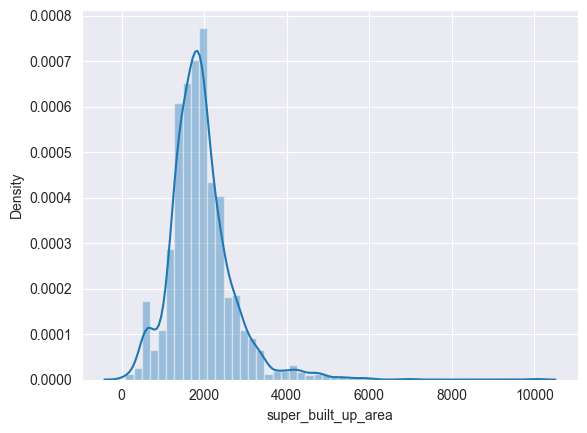

In [50]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

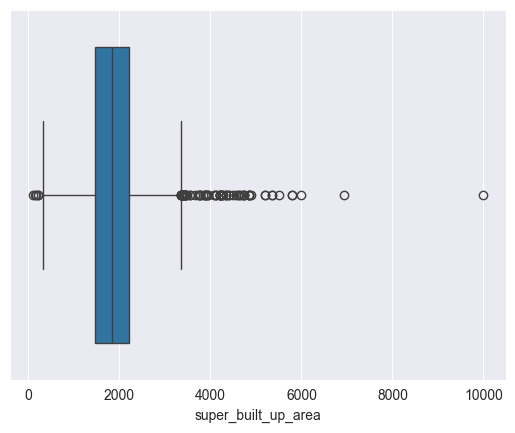

In [51]:
sns.boxplot(x=df['super_built_up_area'])

In [52]:
df['super_built_up_area'].describe()

count     1916.000000
mean      1921.281602
std        767.137020
min         89.000000
25%       1457.000000
50%       1827.750000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [53]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
926,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,...,10000.0,NaN,NaN,0,1,0,1,1,0,49
2531,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,...,6926.0,NaN,NaN,0,1,0,0,0,1,140


C:\Users\Ayushi\AppData\Local\Temp\ipykernel_4992\2846228355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

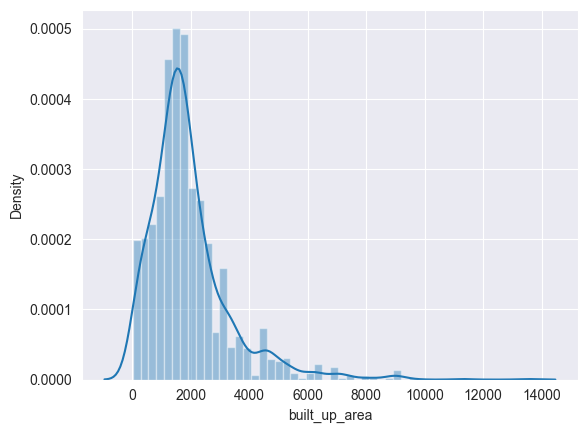

In [54]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

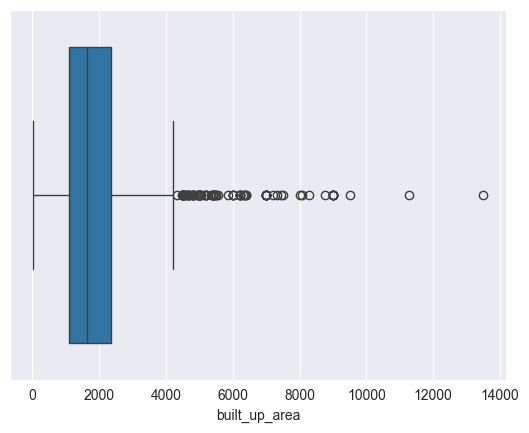

In [55]:
sns.boxplot(x=df['built_up_area'])

In [56]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
151,house,independent,sector 43,27.50,24366.0,1254.0,Plot area 1254(1048.5 sq.m.),6,7,3+,...,NaN,11286.0,NaN,1,1,0,1,1,1,42
2174,house,independent,sector 4,0.85,630.0,1500.0,Plot area 1500(1254.19 sq.m.),3,3,1,...,NaN,13500.0,NaN,0,0,0,0,1,0,0


C:\Users\Ayushi\AppData\Local\Temp\ipykernel_4992\3069271804.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

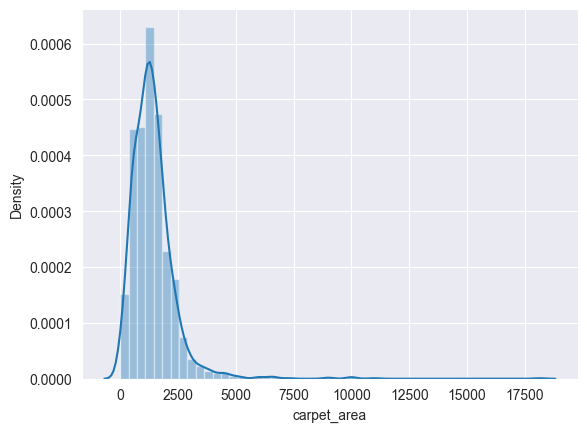

In [57]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

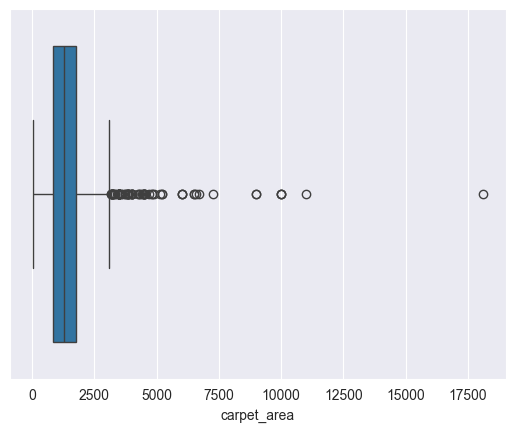

In [58]:
sns.boxplot(x=df['carpet_area'])

In [59]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1157,flat,godrej air,sector 85,2.5,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,...,NaN,NaN,18122.0,1,0,0,1,1,1,44
1443,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,...,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [60]:
df.loc[1157,'carpet_area'] = 1812

In [61]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1443,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,...,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [62]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,raheja navodaya,sector 92,0.62,4807.0,1290.0,Built Up area: 1498 (139.17 sq.m.)Carpet area:...,2,2,2,...,NaN,1498.0,1064.0,0,0,0,0,0,0,0
1,flat,paras quartier,gwal pahari,5.90,11028.0,5350.0,Built Up area: 5350 (497.03 sq.m.),4,4,3+,...,NaN,5350.0,NaN,0,0,0,0,0,0,63
2,flat,signature global synera,sector 81,0.50,7886.0,634.0,Carpet area: 634 (58.9 sq.m.),2,2,1,...,NaN,NaN,634.0,0,0,0,0,0,2,97
3,flat,ss the leaf,sector 85,2.05,7290.0,2812.0,Super Built up area 2812(261.24 sq.m.)Built Up...,4,4,3+,...,2812.0,2500.0,2250.0,0,1,0,0,0,1,49
4,flat,m3m heights,sector 65,1.99,15793.0,1260.0,Super Built up area 1260(117.06 sq.m.),2,2,2,...,1260.0,NaN,NaN,0,0,0,0,0,0,48


C:\Users\Ayushi\AppData\Local\Temp\ipykernel_4992\4196825210.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

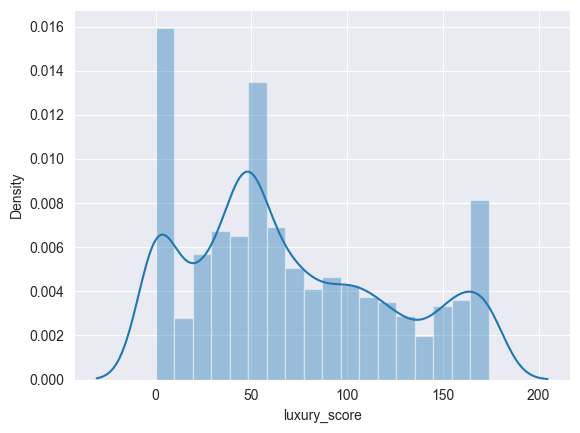

In [63]:
sns.distplot(df['luxury_score'])

<Axes: xlabel='luxury_score'>

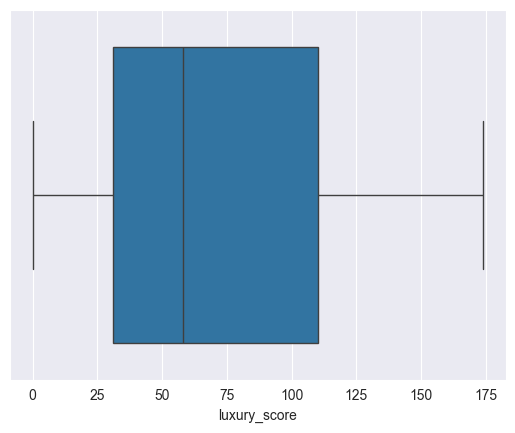

In [64]:
sns.boxplot(x = df['luxury_score'])

In [65]:
df.shape

(3715, 23)

In [66]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [67]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,raheja navodaya,sector 92,0.62,4806.0,1290.0,Built Up area: 1498 (139.17 sq.m.)Carpet area:...,2,2,2,...,NaN,1498.0,1064.0,0,0,0,0,0,0,0
1,flat,paras quartier,gwal pahari,5.90,11028.0,5350.0,Built Up area: 5350 (497.03 sq.m.),4,4,3+,...,NaN,5350.0,NaN,0,0,0,0,0,0,63
2,flat,signature global synera,sector 81,0.50,7886.0,634.0,Carpet area: 634 (58.9 sq.m.),2,2,1,...,NaN,NaN,634.0,0,0,0,0,0,2,97
3,flat,ss the leaf,sector 85,2.05,7290.0,2812.0,Super Built up area 2812(261.24 sq.m.)Built Up...,4,4,3+,...,2812.0,2500.0,2250.0,0,1,0,0,0,1,49
4,flat,m3m heights,sector 65,1.99,15794.0,1260.0,Super Built up area 1260(117.06 sq.m.),2,2,2,...,1260.0,NaN,NaN,0,0,0,0,0,0,48


C:\Users\Ayushi\AppData\Local\Temp\ipykernel_4992\2861189070.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

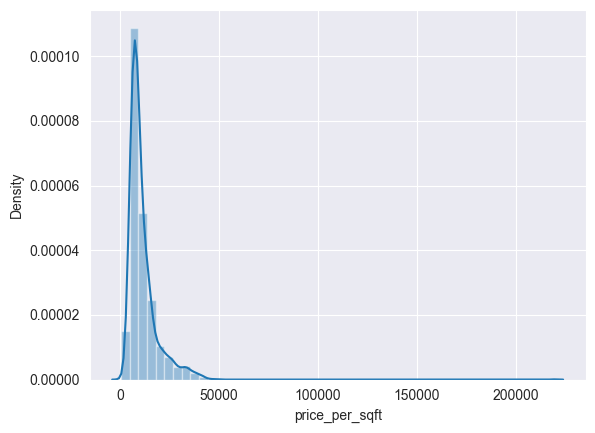

In [68]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

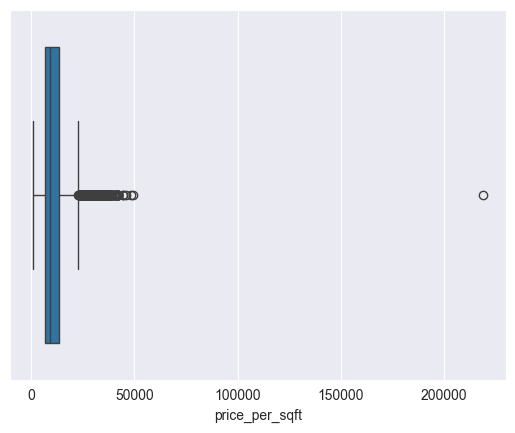

In [69]:
sns.boxplot(x = df['price_per_sqft'])

In [70]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
151,house,independent,sector 43,27.5,219298.0,1254.0,Plot area 1254(1048.5 sq.m.),6,7,3+,...,NaN,11286.0,NaN,1,1,0,1,1,1,42
691,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,...,NaN,4500.0,NaN,0,1,0,1,0,2,97
834,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,...,NaN,2844.0,NaN,1,1,1,1,0,2,0
1247,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,...,NaN,300.0,250.0,0,1,0,1,0,1,88
1310,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,...,NaN,2000.0,1800.0,0,0,0,0,0,0,0
1451,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,...,NaN,4518.0,NaN,1,1,0,0,0,1,121
1686,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,...,NaN,2844.0,NaN,0,1,1,1,0,1,60
2561,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,...,NaN,4500.0,NaN,1,1,1,1,0,1,103
2732,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,...,NaN,2700.0,NaN,0,0,0,1,0,1,7
3166,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,...,NaN,115.0,100.0,0,0,0,0,1,1,44


In [71]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

np.float64(251.10000000000002)

In [72]:
df[(df['area']/df['bedRoom'])<251]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
19,flat,ansal api sushant estate,sector 52,0.29,11600.0,250.0,Carpet area: 250 (23.23 sq.m.),1,1,0,...,NaN,NaN,250.0,0,0,0,0,0,1,49
51,house,independent,sector 21,0.45,8411.0,535.0,Carpet area: 535 (49.7 sq.m.),3,2,1,...,NaN,NaN,535.0,0,0,0,0,0,0,0
60,house,independent,sector 9,0.35,9722.0,360.0,Plot area 40(33.45 sq.m.),2,2,1,...,NaN,360.0,NaN,0,0,0,0,0,0,0
76,house,independent,surat nagar,0.71,10143.0,700.0,Plot area 700(65.03 sq.m.),4,2,1,...,NaN,700.0,NaN,0,0,0,0,0,0,0
92,house,independent,sector 24,3.50,32407.0,1080.0,Plot area 120(100.34 sq.m.),5,4,3,...,NaN,1080.0,NaN,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3730,house,iffco nagar and 17b rwa,sector 17,3.50,24306.0,1440.0,Plot area 1440(133.78 sq.m.),6,5,3,...,NaN,1440.0,NaN,0,0,0,0,0,0,44
3732,house,independent,sector 47,4.30,29312.0,1467.0,Plot area 163(136.29 sq.m.),6,4,2,...,NaN,1467.0,NaN,0,0,0,0,1,0,0
3778,house,independent,sector 2,1.00,8230.0,1215.0,Plot area 135(112.88 sq.m.),9,7,3+,...,NaN,1215.0,NaN,0,0,0,1,0,0,0
3823,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,...,NaN,NaN,1000.0,0,0,0,0,0,0,0


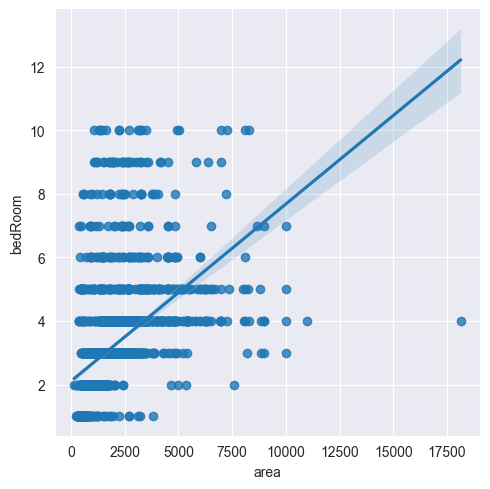

In [74]:
sns.lmplot(data = df, x = 'area', y = 'bedRoom')

In [75]:
df['area_room_ratio'] = df['area'] / df['bedRoom']

In [76]:
(df[df['area_room_ratio'] < 250])['bedRoom'].value_counts()

bedRoom
2     48
3     35
5     28
4     18
6     18
9     16
8     12
7      9
10     8
Name: count, dtype: int64

In [77]:
df = df[df['area_room_ratio'] > 100]

In [78]:
outlier_df = df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 3)]

In [79]:
outlier_df['bedRoom'] = round(outlier_df['bedRoom'] / outlier_df['floorNum'])

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_4992\4193433982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_df['bedRoom'] = round(outlier_df['bedRoom'] / outlier_df['floorNum'])


In [80]:
df.update(outlier_df)

In [81]:
df['area_room_ratio'] = df['area'] / df['bedRoom']

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_4992\2475629895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_room_ratio'] = df['area'] / df['bedRoom']


In [82]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
216,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5,4,2,...,1100.0,900.0,0,0,0,0,0,0,0,220.000000
931,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9,4,3,...,NaN,120.0,0,0,0,0,0,0,0,120.000000
1224,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10,7,3,...,2250.0,NaN,1,1,0,1,1,1,0,225.000000
1435,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5,4,2,...,NaN,110.0,0,0,0,0,0,0,0,198.000000
2109,house,independent,sheetla colony,1.65,8333.0,1980.0,Built Up area: 220 (20.44 sq.m.),9,9,0,...,220.0,NaN,0,0,0,0,0,0,0,220.000000
2236,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8,8,0,...,1782.0,NaN,0,0,0,0,0,0,0,222.750000
2783,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8,8,2,...,1200.0,NaN,0,0,0,0,0,0,0,150.000000
2948,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,...,2250.0,NaN,0,0,0,0,0,0,0,225.000000
2960,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,...,1800.0,NaN,0,0,0,1,0,0,8,200.000000
3133,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5,3,3,...,NaN,900.0,0,0,0,0,0,0,0,180.000000


In [83]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)].shape

(14, 24)

In [84]:
df.shape

(3695, 24)

In [85]:
df = df[~((df['area_room_ratio'] < 250) & (df['bedRoom'] > 4))]

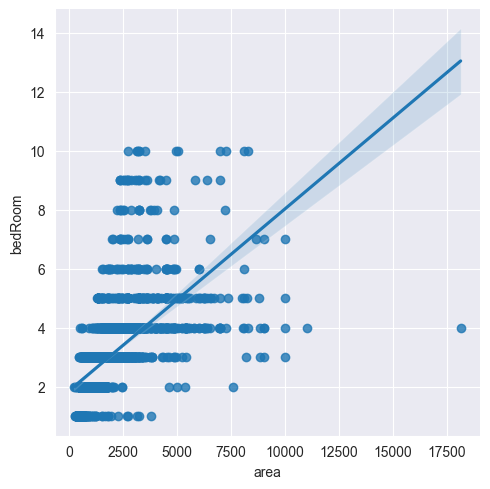

In [86]:
sns.lmplot(data = df, x = 'area', y = 'bedRoom')

In [87]:
df.to_csv('../data/gurgaon_properties_outlier_treated.csv', index=False)